# Regression

In [2]:
using Pkg
Pkg.activate(".")

  Activating 

environment at `e:\Projects\julia-intro\data-science\Project.toml`


In [13]:
using Plots
using Statistics
using StatsBase
using PyCall
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
# using LsqFit

In [4]:
xvals = repeat(1:0.5:10, inner=2)
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals)) .-1

38-element Vector{Float64}:
  4.070504759432398
  4.67785594940071
  4.221173254525294
  4.832131418193389
  5.002112543593952
  4.401137683919021
  5.2744174997973285
  5.047830571081974
  6.396269461507865
  6.541967711626205
  ⋮
 11.60348635198202
 11.178868145253006
 11.680372589611316
 11.849499013586119
 11.380109833647595
 12.081654020331843
 11.664828759705188
 12.278300567707877
 12.100083377388067

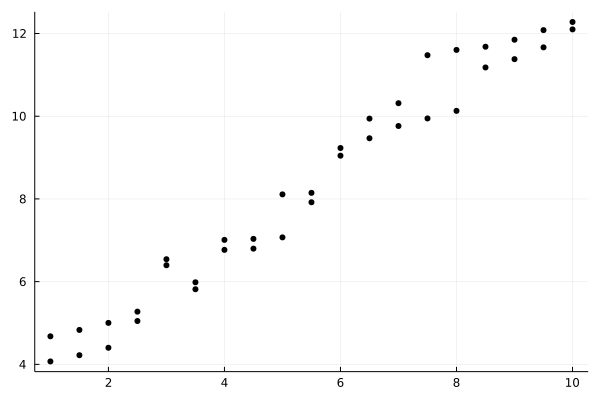

In [5]:
scatter(xvals, yvals, color=:black, leg=false)

In [6]:
function find_best_fit(xvals, yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals, yvals)
    a = r*stdy/stdx
    b = meany - a*meanx 
    return a, b
end

find_best_fit (generic function with 1 method)

In [7]:
a, b = find_best_fit(xvals, yvals)
ynew = a .* xvals .+ b

38-element Vector{Float64}:
  4.0132967906483135
  4.0132967906483135
  4.492095466919331
  4.492095466919331
  4.970894143190346
  4.970894143190346
  5.449692819461363
  5.449692819461363
  5.92849149573238
  5.92849149573238
  ⋮
 10.716478258442544
 11.195276934713561
 11.195276934713561
 11.674075610984577
 11.674075610984577
 12.152874287255594
 12.152874287255594
 12.63167296352661
 12.63167296352661

In [8]:
np = pyimport("numpy");

  0.000373 seconds (42 allocations: 2.188 KiB)


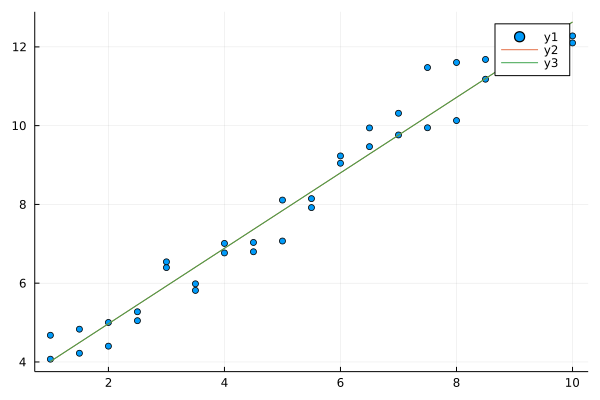

In [10]:
xdata = xvals;
ydata = yvals;
@time myfit = np.polyfit(xdata, ydata, 1);
ynew2 = collect(xdata) .* myfit[1] .+ myfit[2];
scatter(xvals, yvals)
plot!(xvals, ynew)
plot!(xvals, ynew2)

In [3]:
data = DataFrame(X=xdata, Y=ydata)
ols = lm(@formula(Y ~ X), data)
plot!(xdata, predict(ols))

UndefVarError: UndefVarError: xdata not defined

Now let's get some real data. We will use housing information from zillow, check out the file `zillow_data_download_april2020.xlsx` for a quick look of what the data looks like. Our goal will be to build a linear regression model between the number of houses listed vs the number of houses sold in a few states. Fitting these models can serve as a key real estate indicator.

In [4]:
# Play around with data for a bit
R = XLSX.readxlsx("data/zillow_data_download_april2020.xlsx")

XLSXFile("zillow_data_download_april2020.xlsx") containing 4 Worksheets
            sheetname size          range        
-------------------------------------------------
 MonthlyListings_City 8348x91       A1:CM8348    
     Sale_counts_city 28760x148     A1:ER28760   
Sales_median_price_c… 3767x148      A1:ER3767    
                 meta 1x1           A1:A1        


In [5]:
sale_counts = R["Sale_counts_city"][:]
df_sale_counts = DataFrame(sale_counts[2:end,:], Symbol.(sale_counts[1,:]))

monthly_listings = R["MonthlyListings_City"][:]
df_monthly_listings = DataFrame(monthly_listings[2:end, :], Symbol.(monthly_listings[1,:]))

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03
,Any,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,28904,28155,30596
2,2,12447,Los Angeles,City,CA,6431,6613,6467
3,3,39051,Houston,City,TX,11696,11737,12291
4,4,17426,Chicago,City,IL,9523,9609,9772
5,5,6915,San Antonio,City,TX,7223,7170,7438
6,6,13271,Philadelphia,City,PA,7505,7266,7578
7,7,40326,Phoenix,City,AZ,6232,5720,5872
8,8,18959,Las Vegas,City,NV,7027,6218,6199
9,9,54296,San Diego,City,CA,4121,3844,3932


In [6]:
monthly_listings_2020_02 = df_monthly_listings[!,[1,2,3,4,5,end]]
rename!(monthly_listings_2020_02, Symbol("2020-02") .=> Symbol("listings"))

sale_counts_2020_02 = df_sale_counts[!,[1,end]]
rename!(sale_counts_2020_02, Symbol("2020-02") .=> Symbol("sales"))

,RegionID,sales
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


In [7]:
Feb2020data = innerjoin(monthly_listings_2020_02,sale_counts_2020_02,on=:RegionID) #, type="outer")
dropmissing!(Feb2020data)
sales = Feb2020data[!,:sales]
# prices = Feb2020data[!,:price]
counts = Feb2020data[!,:listings]
using DataStructures
states = Feb2020data[!,:StateName]
C = counter(states)
C.map
countvals = values(C.map)
topstates = sortperm(collect(countvals),rev=true)[1:10]
states_of_interest = collect(keys(C.map))[topstates]
all_plots = Array{Plots.Plot}(undef,10)

10-element Vector{Plots.Plot}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

(si, coef(ols)) = ("CA", [0.29595375979515304])


(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])


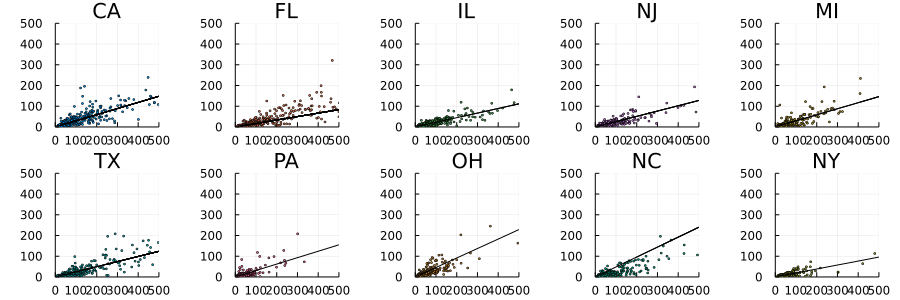

(si, coef(ols)) = ("NY", [0.19151984869233082])


In [10]:
all_plots = Array{Plots.Plot}(undef,10)
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)    
    all_plots[i] = scatter(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,title=si)
    @show si,coef(ols)
    plot!(counts[curids],predict(ols),color=:black)
end
plot(all_plots...,layout=(2,5),size=(900,300))

# Logistic Regression

So far, we have shown several ways to solve the linear regression problem in Julia. Here, we will first start with a motivating example of when you would want to use logistic regression. Let's assume that our predictor vector is binary (0 or 1), let's fit a linear regression model.

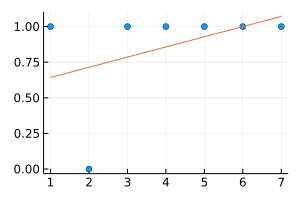

In [11]:
data = DataFrame(X=[1,2,3,4,5,6,7], Y=[1,0,1,1,1,1,1])
linear_reg = lm(@formula(Y ~ X), data)
scatter(data[!,:X],data[!,:Y],legend=false,size=(300,200))
plot!(1:7,predict(linear_reg))


What this plot quickly shows is that linear regression may end up predicting values outside the [0,1] interval. For an example like this, we will use logistic regression. Interestingly, a generalized linear model (https://en.wikipedia.org/wiki/Generalized_linear_model) unifies concepts like linear regression and logistic regression, and the GLM package allows you to apply either of these regressions easily by specifying the distribution family and the link function.

To apply logistic regression via the GLM package, you can readily use the Binomial() family and the LogitLink() link function.

Let's load some data and take a look at one example.

In [14]:
#we will load this data from RDatasets
cats = dataset("MASS", "cats")

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6
7,F,2.1,8.1
8,F,2.1,8.2
9,F,2.1,8.3


We will map the sex of each cat to a binary 0/1 value.

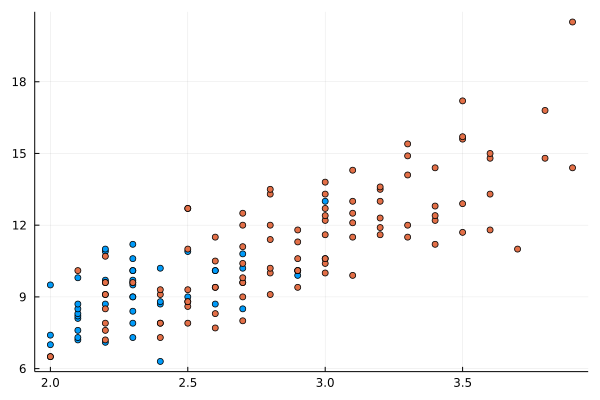

In [15]:
lmap = labelmap(cats[!,:Sex])
ci = labelencode(lmap, cats[!,:Sex])
scatter(cats[!,:BWt],cats[!,:HWt],color=ci,legend=false)

In [16]:

lmap

LabelMap (with 2 labels):
[1] F
[2] M


Females (color 1) seem to be more present in the lower left corner and Males (color 2) seem to be present in the top right corner. Let's run a logistic regression model on this data.

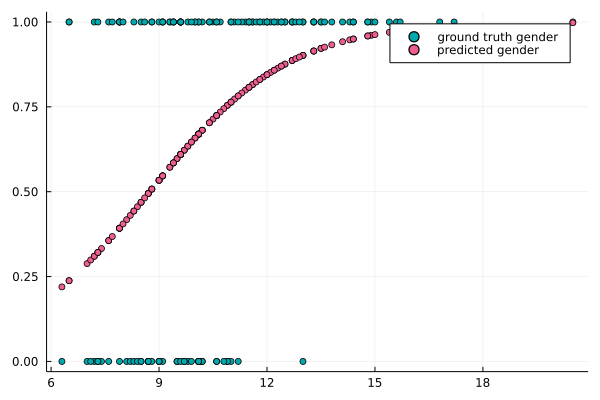

In [17]:

data = DataFrame(X=cats[!,:HWt], Y=ci.-1)
probit = glm(@formula(Y ~ X), data, Binomial(), LogitLink())
scatter(data[!,:X],data[!,:Y],label="ground truth gender",color=6)
scatter!(data[!,:X],predict(probit),label="predicted gender",color=7)